In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv("Heart Failure Prediction.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [5]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
data.isnull().sum()#there is no null values in the dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

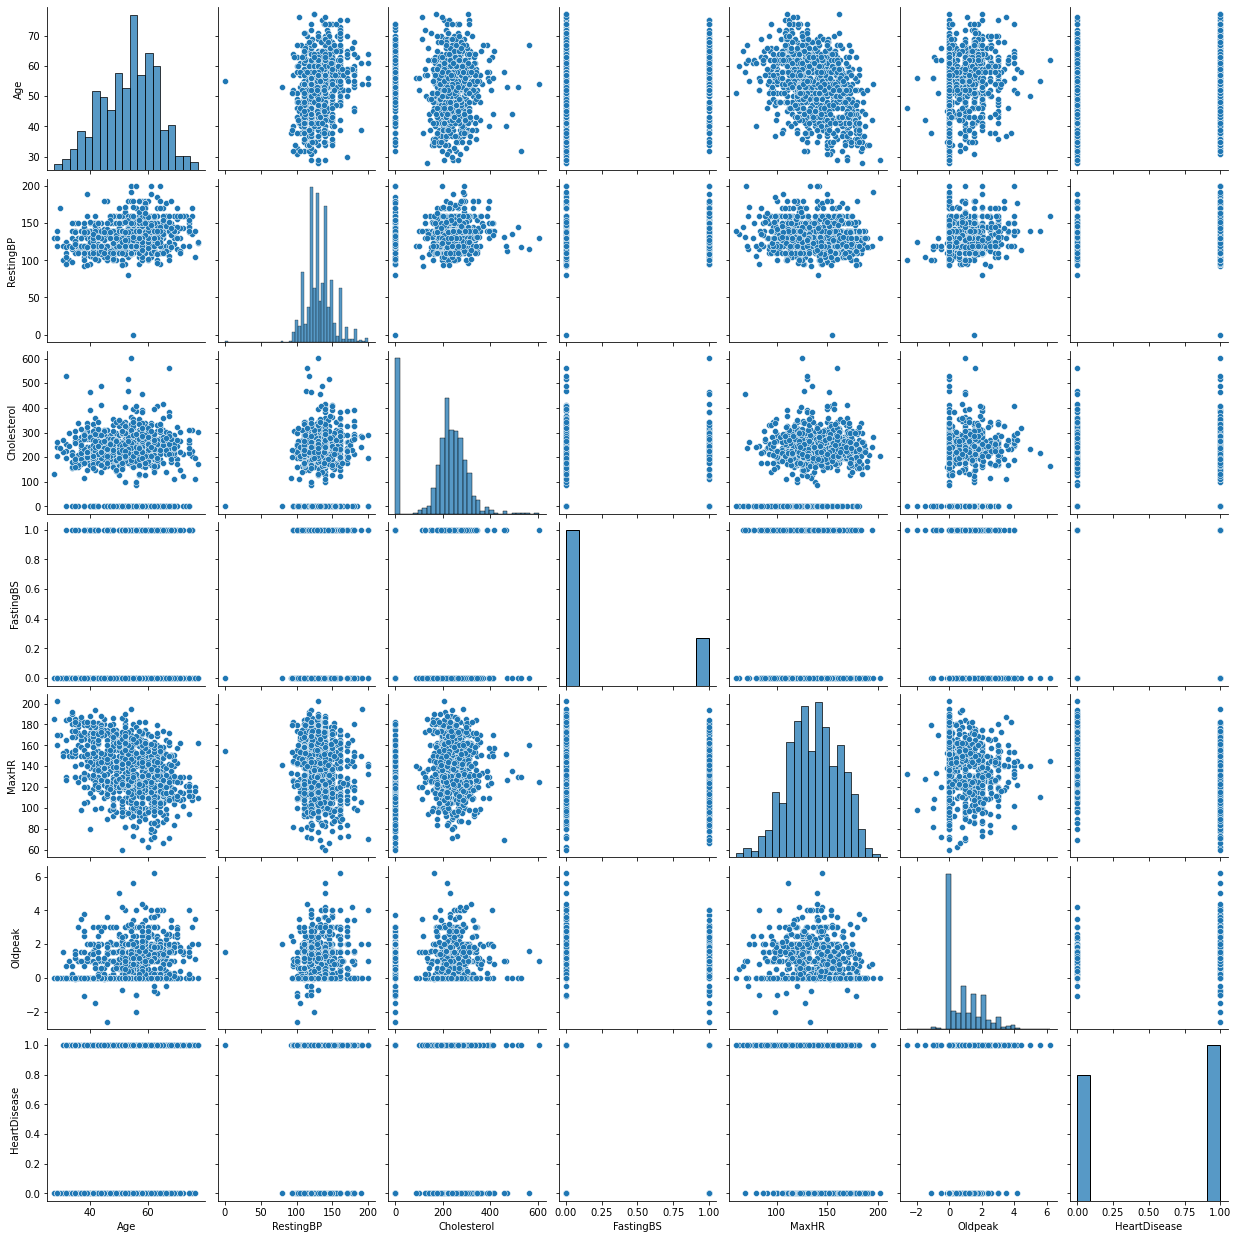

In [7]:
sns.pairplot(data)

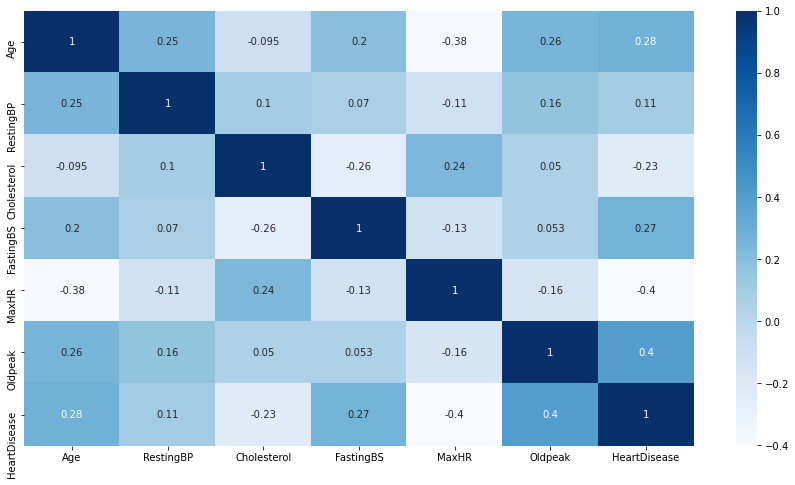

In [8]:
#values are not highly correlated 
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot=True)
plt.show()

In [9]:
#converting text data into numeric
data = pd.get_dummies(data,columns =[ 'Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)

In [10]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1


In [11]:
#afrter encoding columns has been incresed to 16
data.shape

(918, 16)

In [12]:
X = data.drop(columns='HeartDisease')
Y = data['HeartDisease']

In [30]:
#Accuracy using KFold

def fit_KF(model,X,Y):
    kf = KFold(n_splits=10,shuffle=True,random_state=1)
    #using K-fold
    acc_KFold= cross_val_score(model,X,Y,cv=kf,scoring='accuracy' )
    print(f"----------------------------------------------------------------------------\n\n\t\t\t KFold \n\n----------------------------------------------------------------------------")
    print(f"Accuracy using KFold for {model} : {acc_KFold.mean()*100} \n")

#Accuracy using Stratified KFold 
    
def fit_SKF(model,X,Y):
    skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
    print(f"----------------------------------------------------------------------------\n\n\t\t\t Stratified KFold\n\n----------------------------------------------------------------------------")
    acc_SKFold = cross_val_score(model,X,Y,cv=skf,scoring='accuracy' )
    print(f"Accuracy using Stratified KFold {model} : {acc_SKFold.mean()*100} \n")
    
#Accurray whn using Train-Test-Split    
    
def split_fit(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1) 
    model.fit(X_train,Y_train)
    model.score(X_test,Y_test)
    y_pred = model.predict(X_test)
    confusion_matrix(Y_test,y_pred)
    acc = sklearn.metrics.accuracy_score(Y_test,y_pred)
    print(f"----------------------------------------------------------------------------\n\n\t\t\t Train Test Split \n\n----------------------------------------------------------------------------")
    print(f"Accuracy using Train-test-split {model} : {acc.mean()*100}")
    confusion_mat = confusion_matrix(Y_test,y_pred)
    print(f"confusion_matrix  \n {confusion_mat}")
    classfication_rep = classification_report(Y_test,y_pred)
    print(f"classification_report  \n {classfication_rep}")


    

In [29]:
DeTree = DecisionTreeClassifier()
fit_KF(DeTree,X,Y)
fit_SKF(DeTree,X,Y)
split_fit(DeTree,X,Y)

----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
Accuracy using KFold for DecisionTreeClassifier() : 76.7 

----------------------------------------------------------------------------

			 Stratified KFold

----------------------------------------------------------------------------
Accuracy using Stratified KFold DecisionTreeClassifier() : 77.45555555555555 



<IPython.core.display.Javascript object>

----------------------------------------------------------------------------

			 Train Test Split 

----------------------------------------------------------------------------
Accuracy using Train-test-split DecisionTreeClassifier() : 73.36956521739131
confusion_matrix  
 [[56 18]
 [31 79]]
classification_report  
               precision    recall  f1-score   support

           0       0.64      0.76      0.70        74
           1       0.81      0.72      0.76       110

    accuracy                           0.73       184
   macro avg       0.73      0.74      0.73       184
weighted avg       0.75      0.73      0.74       184



In [31]:
RandForest = RandomForestClassifier(n_estimators=600)
fit_KF(RandForest,X,Y)
fit_SKF(RandForest,X,Y)
split_fit(RandForest,X,Y)

----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
Accuracy using KFold for RandomForestClassifier(n_estimators=600) : 87.03296703296702 

----------------------------------------------------------------------------

			 Stratified KFold

----------------------------------------------------------------------------
Accuracy using Stratified KFold RandomForestClassifier(n_estimators=600) : 86.9302436693741 



<IPython.core.display.Javascript object>

----------------------------------------------------------------------------

			 Train Test Split 

----------------------------------------------------------------------------
Accuracy using Train-test-split RandomForestClassifier(n_estimators=600) : 88.04347826086956
confusion_matrix  
 [[ 93  16]
 [ 17 150]]
classification_report  
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.90      0.90      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [23]:
LogReg = LogisticRegression(max_iter=1000)
fit_KF(LogReg,X,Y)
fit_SKF(LogReg,X,Y)
split_fit(LogReg,X,Y)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
Accuracy using KFold for LogisticRegression(max_iter=1000) : 86.05112279025322 

----------------------------------------------------------------------------

			 Stratified KFold

----------------------------------------------------------------------------
Accuracy using Stratified KFold LogisticRegression(max_iter=1000) : 86.27806975633062 



<IPython.core.display.Javascript object>

----------------------------------------------------------------------------

			 Train Test Split 

----------------------------------------------------------------------------
Accuracy using Train-test-split LogisticRegression(max_iter=1000) : 88.40579710144928
confusion_matrix  
 [[ 98  11]
 [ 21 146]]
classification_report  
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.93      0.87      0.90       167

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



In [191]:
#using Naive Bayes

Naive_Bayes = GaussianNB()
fit_KF(Naive_Bayes,X,Y)
fit_SKF(Naive_Bayes,X,Y)
split_fit(Naive_Bayes,X,Y)

----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
Accuracy using KFold for GaussianNB() : 85.83492594362158 

----------------------------------------------------------------------------

			 Stratified KFold

----------------------------------------------------------------------------
Accuracy using Stratified KFold GaussianNB() : 86.05828953655042 



<IPython.core.display.Javascript object>

----------------------------------------------------------------------------

			 Train Test Split 

----------------------------------------------------------------------------
Accuracy using Train-test-split GaussianNB() : 86.95652173913044
confusion_matrix  
 [[ 96  13]
 [ 23 144]]
classification_report  
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

